# USED CAR PRICE PREDICTION

# Process Flow of Project
1. Understanding Problem Statement
2. Data Collection & Getting System Ready
3. Understanding the Data
4. Exploratory Data Analysis (EDA)
    - Univariate Analysis
    - Bivariate Analysis
    - Multivariate Analysis
5. Data Preprocessing & Feature Engineerig
6. Model Training & Evaluation
7. Hyperparameter Tuninng & Evaluation
8. Model Selction
9. Model Deployment


# 1.Understanding Problem Statement

### Problem Statement
Determining the right price for a used car is a complex task because it depends on multiple interconnected factors such as the vehicle’s specifications, usage history, and market trends. Without a data-driven approach, pricing often relies on guesswork, leading to overvaluation or undervaluation. By applying machine learning, we aim to develop a predictive model that can analyze historical car data and provide accurate selling price estimates, ensuring fairness and efficiency in the used car market.

---

### Objective
The goal of this project is to **predict the selling price of a used car** based on its features.  
This is a **Supervised Machine Learning Regression Problem** because the target variable (`selling_price`) is continuous.

---

### Type of Problem
- **Input:** Car attributes (categorical + numerical features).
- **Output:** `selling_price` (numeric value).
- **ML Type:** Regression.
- **Business Use Case:** Helps sellers, buyers, and dealers estimate fair car prices.

---





# 2.Data Collection and Getting System Ready

- importing required libraries of python in our Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

- we are using cardekho used car Data set for our model

In [2]:
import os

download_dir = "./data/"

download_url = "https://raw.githubusercontent.com/manishkr1754/CarDekho_Used_Car_Price_Prediction/main/notebooks/data/cardekho_dataset.csv"

os.makedirs(download_dir,exist_ok=True)

filename = os.path.basename(download_url)

download_file_path = os.path.join(download_dir, filename)

urllib.request.urlretrieve(download_url, download_file_path)

print('-'*100)
print('Data with name ' + filename + ' Downloaded at ' + download_file_path)
print('-'*100)

df = pd.read_csv(download_file_path, index_col=[0])

----------------------------------------------------------------------------------------------------
Data with name cardekho_dataset.csv Downloaded at ./data/cardekho_dataset.csv
----------------------------------------------------------------------------------------------------


# 3.Understanding the Data

In [4]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:
print("shape of Dataframe : ",df.shape)
print("==  "*25)
df.info()

shape of Dataframe :  (15411, 13)
==  ==  ==  ==  ==  ==  ==  ==  ==  ==  ==  ==  ==  ==  ==  ==  ==  ==  ==  ==  ==  ==  ==  ==  ==  
<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
m

### Dataset Information
The dataset is from **CarDekho (Used Cars)** and contains details of ~15,000 cars with 13 columns.

**Features:**
- `car_name` → Name of the car (e.g., Maruti Alto, Hyundai i20).
- `brand` → Car manufacturer brand (e.g., Maruti, Hyundai, Ford).
- `model` → Car model name.
- `vehicle_age` → Age of the vehicle (in years).
- `km_driven` → Kilometers driven by the car.
- `seller_type` → Type of seller (Dealer / Individual).
- `fuel_type` → Type of fuel (Petrol / Diesel / CNG).
- `transmission_type` → Gear type (Manual / Automatic).
- `mileage` → Mileage of the car (km per litre).
- `engine` → Engine capacity (in cc).
- `max_power` → Maximum power output (in bhp).
- `seats` → Number of seats in the car.
- `selling_price` → **Target variable** (price of the used car in INR).

---

In [6]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
print('Numerical Features :', num_features)
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
print('Categorical Features :',cat_features)

Num of Numerical Features : 7
Numerical Features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
Num of Categorical Features : 6
Categorical Features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


# 4.Exploratory Data Analysis (EDA)

## 4.1.Checking missing values

In [6]:
df.isnull().sum()

,0
car_name,0
brand,0
model,0
vehicle_age,0
km_driven,0
seller_type,0
fuel_type,0
transmission_type,0
mileage,0
engine,0


- there is no missing values found

## 4.2.Summary statistics

In [7]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
df.describe()

Summary Statistics of numerical features for DataFrame are as follows:


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [8]:
print('Summary Statistics of categorical features for DataFrame are as follows:')
df.describe(include= 'object')

Summary Statistics of categorical features for DataFrame are as follows:


,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


In [9]:
print(f"there is {len(df['car_name'].unique())} unique car names : \n {df['car_name'].unique()} ")
print("__  "*25)
print(f"there is {len(df['brand'].unique())} unique brands : \n {df['brand'].unique()} ")
print("__  "*25)
print(f"there is {len(df['model'].unique())} unique models : \n {df['model'].unique()} ")
print("__  "*25)
print(f"there is {len(df['seller_type'].unique())} unique seller types : \n {df['seller_type'].unique()} ")
print("__  "*25)
print(f"there is {len(df['fuel_type'].unique())} unique fuel types : \n {df['fuel_type'].unique()} ")
print("__  "*25)
print(f"there is {len(df['transmission_type'].unique())} unique transmission types : \n {df['transmission_type'].unique()} ")

there is 121 unique car names : 
 ['Maruti Alto' 'Hyundai Grand' 'Hyundai i20' 'Ford Ecosport'
 'Maruti Wagon R' 'Hyundai i10' 'Hyundai Venue' 'Maruti Swift'
 'Hyundai Verna' 'Renault Duster' 'Mini Cooper' 'Maruti Ciaz'
 'Mercedes-Benz C-Class' 'Toyota Innova' 'Maruti Baleno'
 'Maruti Swift Dzire' 'Volkswagen Vento' 'Hyundai Creta' 'Honda City'
 'Mahindra Bolero' 'Toyota Fortuner' 'Renault KWID' 'Honda Amaze'
 'Hyundai Santro' 'Mahindra XUV500' 'Mahindra KUV100' 'Maruti Ignis'
 'Datsun RediGO' 'Mahindra Scorpio' 'Mahindra Marazzo' 'Ford Aspire'
 'Ford Figo' 'Maruti Vitara' 'Tata Tiago' 'Volkswagen Polo' 'Kia Seltos'
 'Maruti Celerio' 'Datsun GO' 'BMW 5' 'Honda CR-V' 'Ford Endeavour'
 'Mahindra KUV' 'Honda Jazz' 'BMW 3' 'Audi A4' 'Tata Tigor'
 'Maruti Ertiga' 'Tata Safari' 'Mahindra Thar' 'Tata Hexa'
 'Land Rover Rover' 'Maruti Eeco' 'Audi A6' 'Mercedes-Benz E-Class'
 'Audi Q7' 'BMW Z4' 'BMW 6' 'Jaguar XF' 'BMW X5' 'MG Hector' 'Honda Civic'
 'Isuzu D-Max' 'Porsche Cayenne' 'BMW X1' 'Sko

## 4.3.Univariate Analysis

- Univariate Analysis for numerical Features -> Histogram

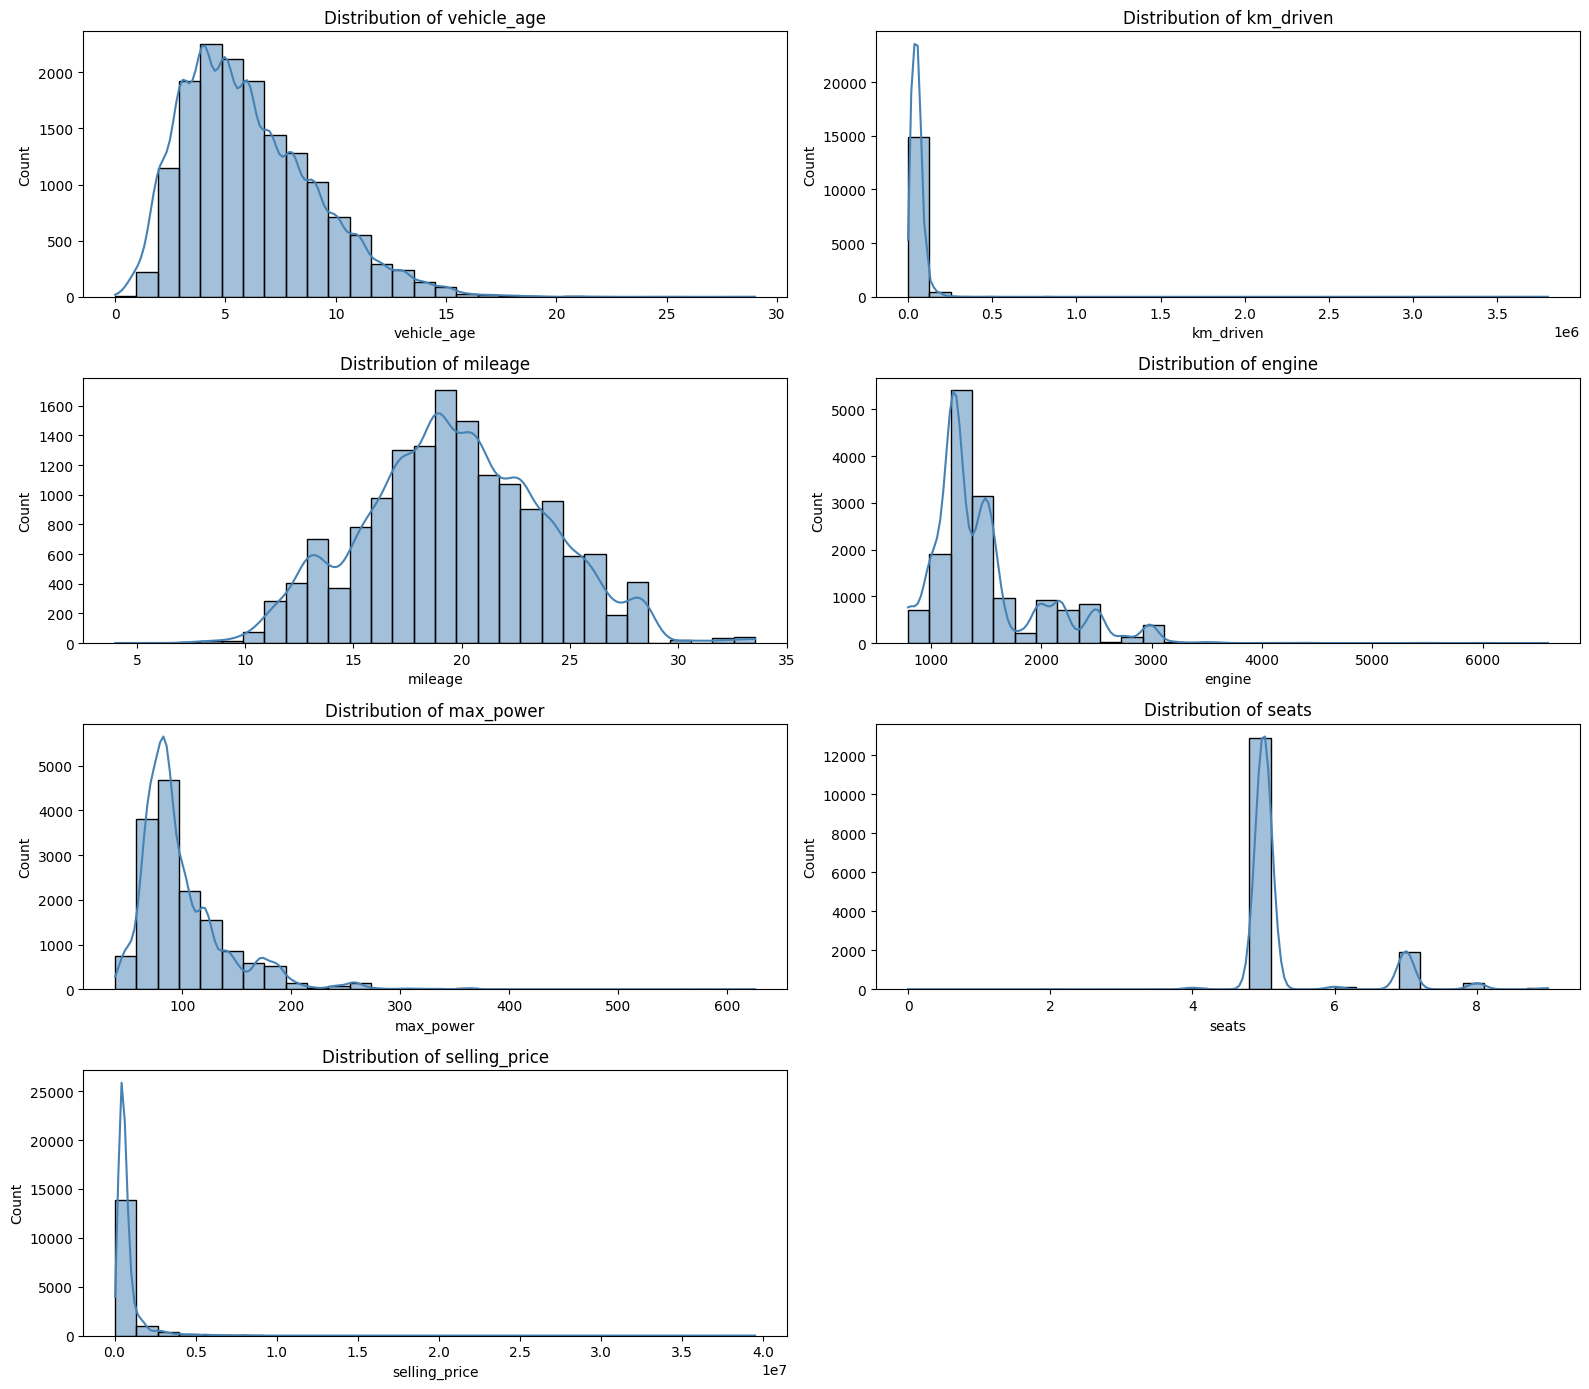

In [10]:
num_cols = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

plt.figure(figsize=(16, 14))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//2 + 1, 2, i)  # rows, cols, index
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


- Univariate Analysis for Numerical Features -> Boxplot

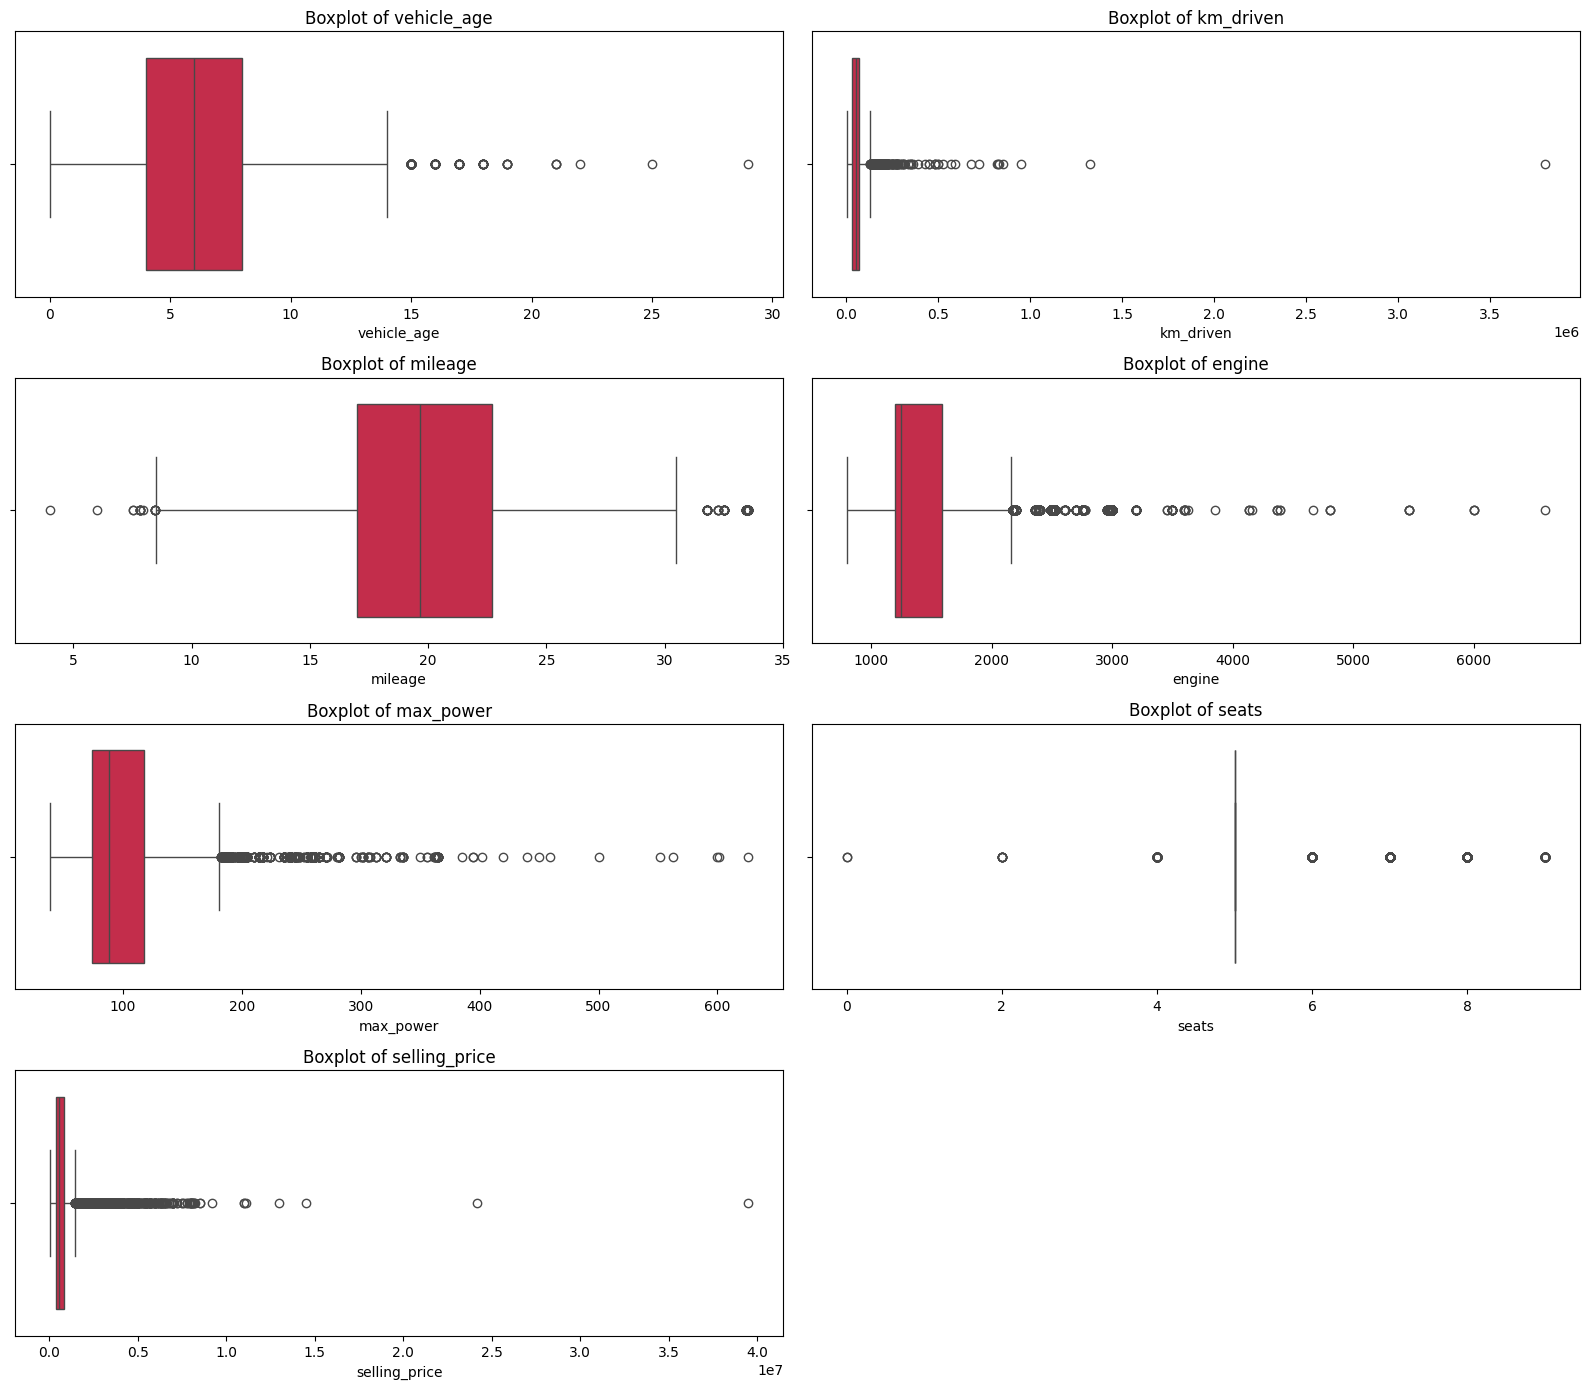

In [11]:
plt.figure(figsize=(16,14))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//2 + 1, 2, i)
    sns.boxplot(x=df[col], color='crimson')
    plt.title(f"Boxplot of {col}", fontsize=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()


- Univariate Analysis for Categorical Features

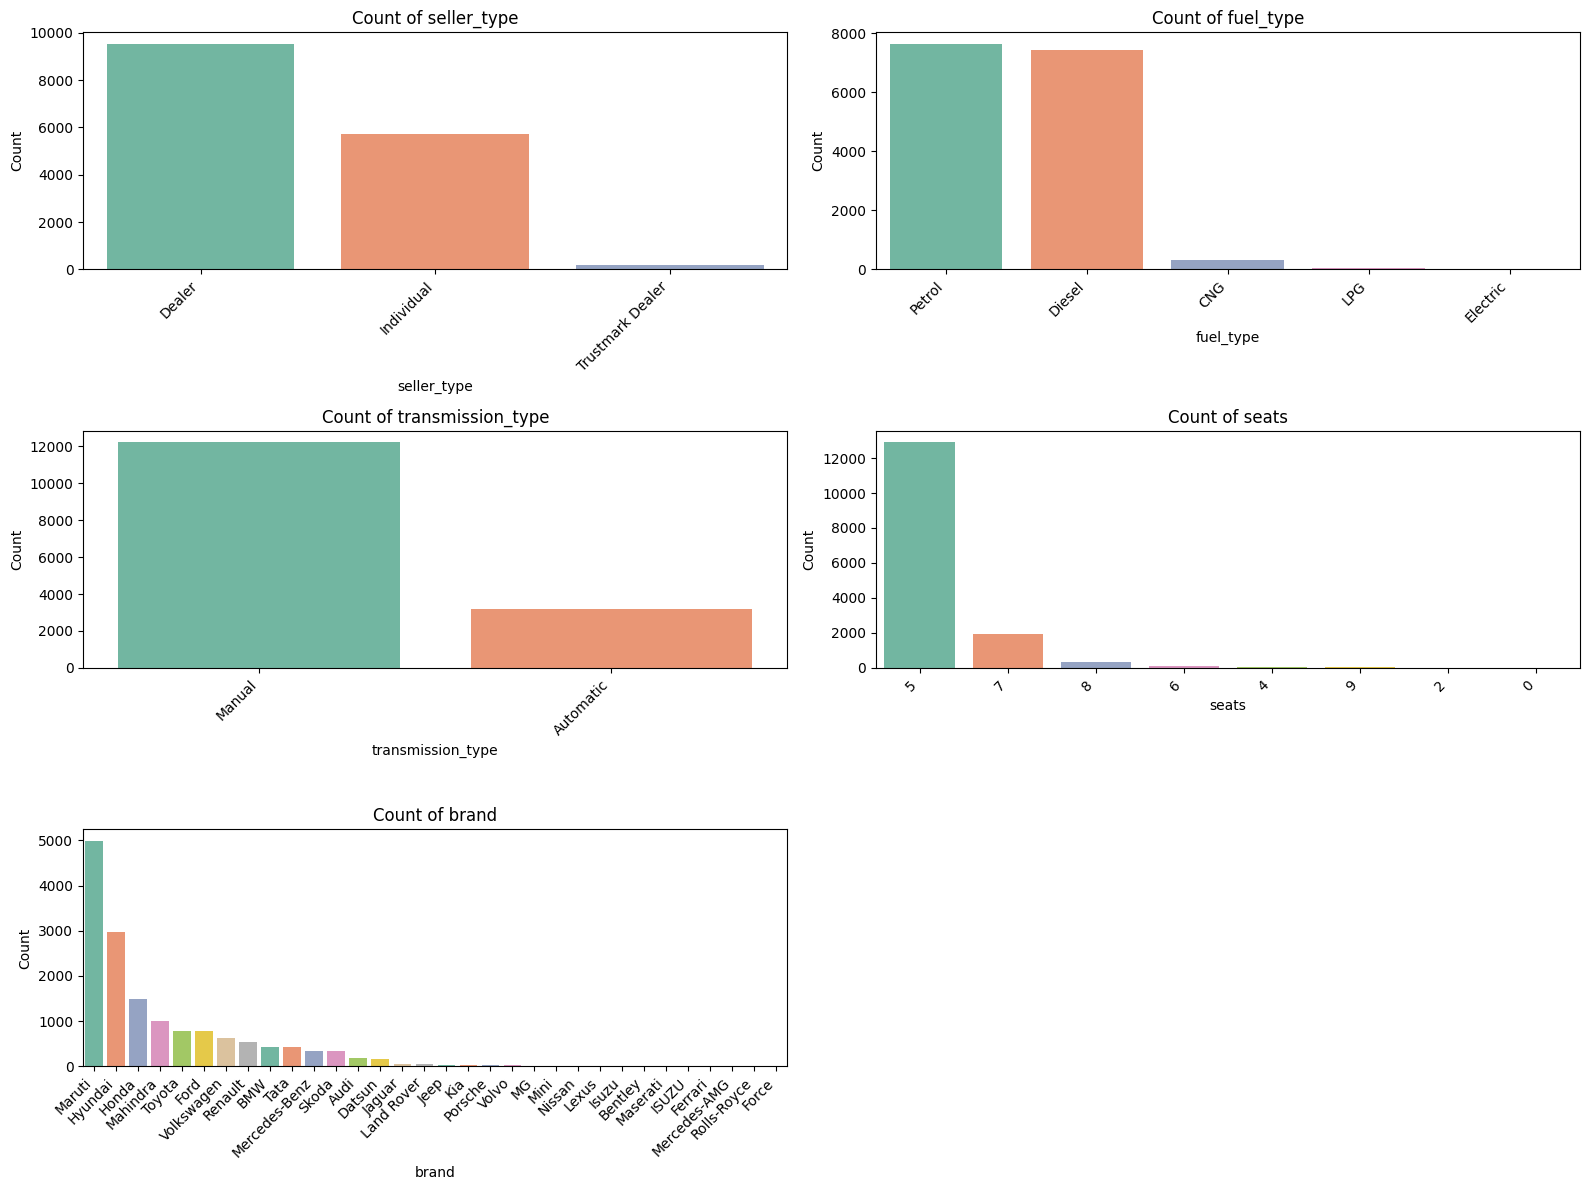

In [12]:
cat_cols = ['seller_type', 'fuel_type', 'transmission_type', 'seats','brand']

plt.figure(figsize=(16, 12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols)//2 + 1, 2, i)
    sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
    plt.title(f"Count of {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## 4.4.Bivariate Analysis

- scatter plot for Bivariate Analysis

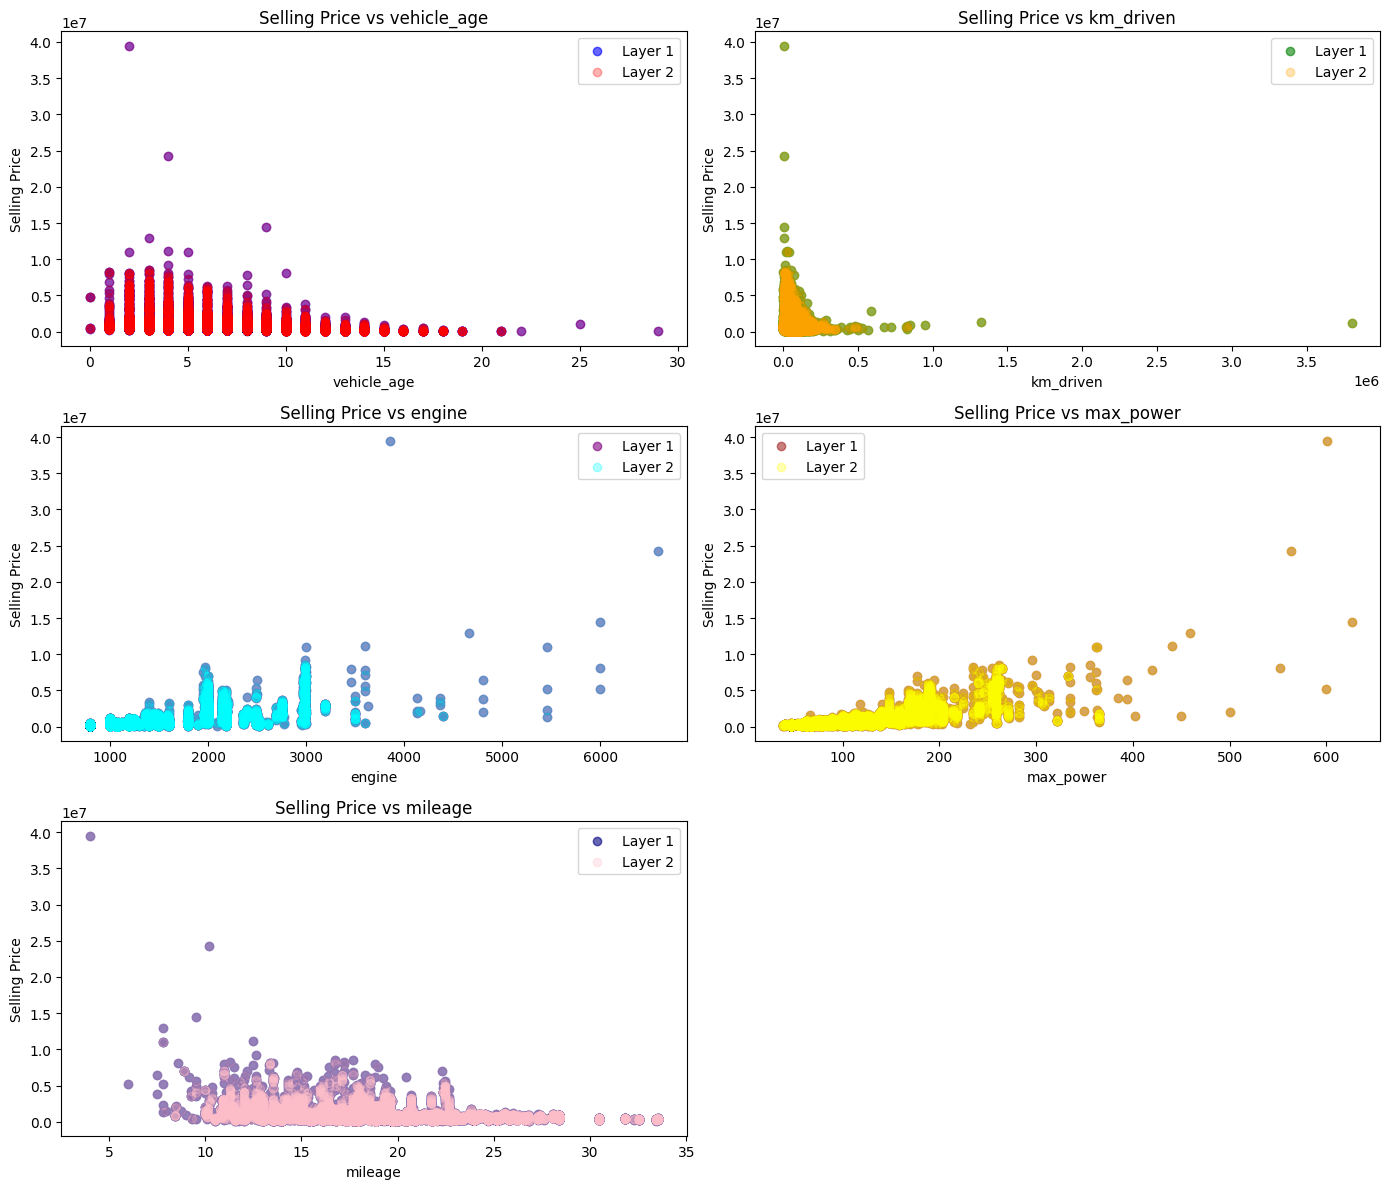

In [13]:
num_features = ['vehicle_age', 'km_driven', 'engine', 'max_power', 'mileage']
colors = [('blue', 'red'), ('green', 'orange'), ('purple', 'cyan'), ('brown', 'yellow'), ('navy', 'pink')]

plt.figure(figsize=(14, 12))

for i, col in enumerate(num_features, 1):
    plt.subplot(len(num_features)//2 + 1, 2, i)
    plt.scatter(df[col], df['selling_price'], alpha=0.6, color=colors[i-1][0], label='Layer 1')
    plt.scatter(df[col], df['selling_price'], alpha=0.3, color=colors[i-1][1], label='Layer 2')
    plt.title(f"Selling Price vs {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Selling Price")
    plt.legend()

plt.tight_layout()
plt.show()



- boxplot for Bivariate Analysis ->

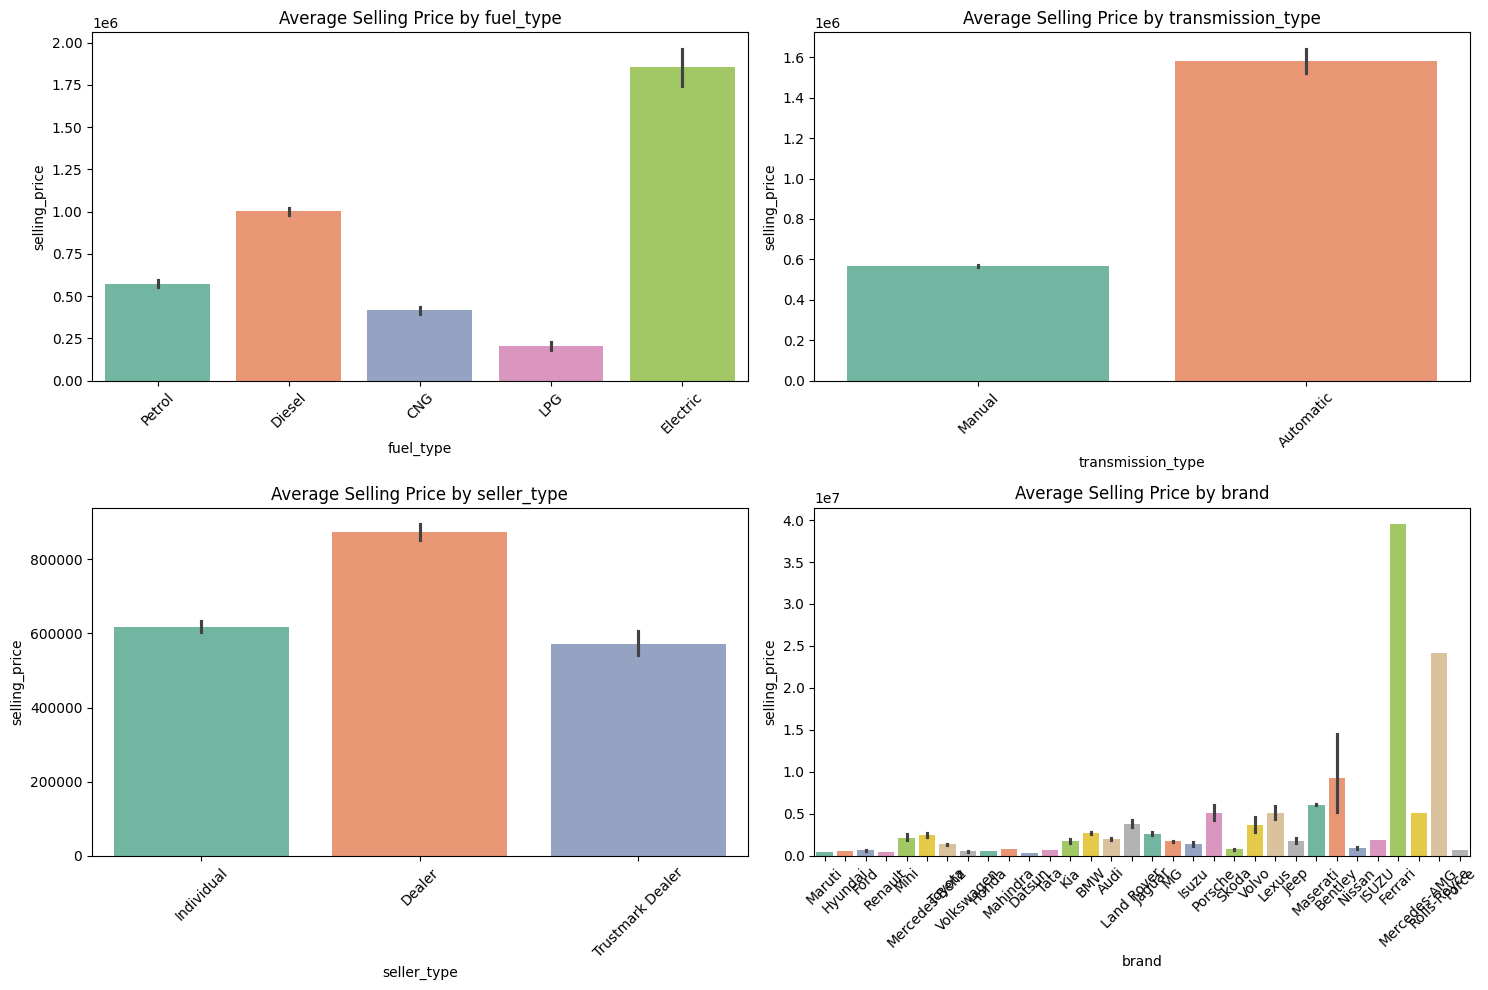

In [14]:
categorical_features = ["fuel_type", "transmission_type", "seller_type", "brand"]

plt.figure(figsize=(15,10))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=col, y="selling_price", data=df, estimator=np.mean, palette="Set2")
    plt.title(f"Average Selling Price by {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## 4.5.Multivariate Analysis

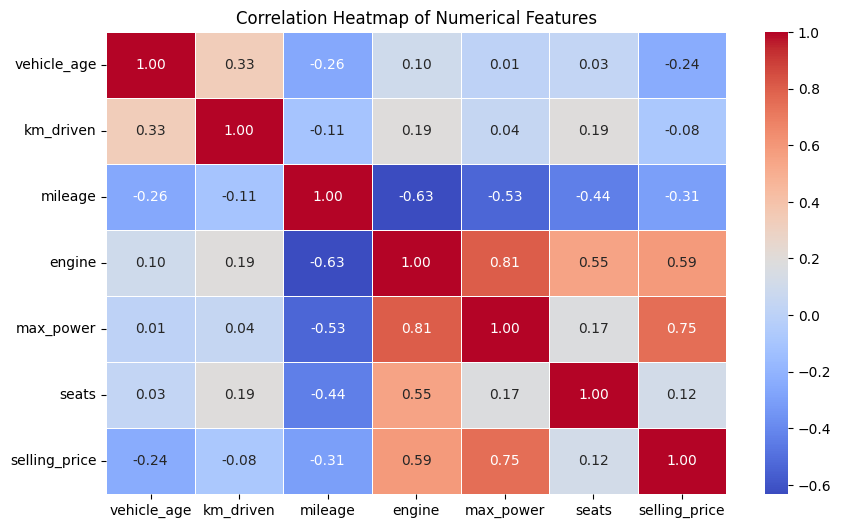

In [15]:
#correlation
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# 5.Data Preprocessing and Feature Engineering

- 5.1.drop unecessary features

In [3]:
df.drop(['brand','model'],inplace=True,axis=1)

In [8]:
df.head()

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
df.sort_values(by=['car_name','selling_price'])

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
14436,Audi A4,11,82000,Dealer,Petrol,Automatic,12.30,1781,163.20,5,750000
17128,Audi A4,10,100000,Dealer,Diesel,Automatic,17.11,1968,174.33,5,780000
2213,Audi A4,11,67000,Dealer,Petrol,Automatic,10.80,1984,132.00,5,845000
15502,Audi A4,10,64690,Dealer,Diesel,Automatic,16.55,1968,140.00,5,890000
10570,Audi A4,10,69000,Dealer,Diesel,Automatic,17.11,1968,174.33,5,925000
...,...,...,...,...,...,...,...,...,...,...,...
14238,Volvo XC60,7,70252,Dealer,Diesel,Automatic,11.20,2400,215.00,5,1825000
13554,Volvo XC90,5,85000,Dealer,Diesel,Automatic,17.20,1969,235.00,7,4100000
3813,Volvo XC90,6,80000,Individual,Diesel,Automatic,17.20,1969,235.00,7,4350000
9611,Volvo XC90,3,33000,Dealer,Diesel,Automatic,17.20,1969,235.00,7,5499000


In [10]:
## Getting All Different Types OF Features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Numerical Features : 7
Num of Categorical Features : 4
Num of Discrete Features : 2
Num of Continuous Features : 5


In [5]:
## Indpendent and dependent features
from sklearn.model_selection import train_test_split
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']

In [12]:
X.head()

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,Hyundai Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,Hyundai i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,Maruti Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,Ford Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [13]:
y.head()

,selling_price
0,120000
1,550000
2,215000
3,226000
4,570000


- log transformation of output feature selling_price

In [6]:
y = np.log1p(y)

In [7]:
y.head()

,selling_price
0,11.695255
1,13.217675
2,12.278398
3,12.328295
4,13.253393


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['car_name']=le.fit_transform(X['car_name'])

In [9]:
# Save mapping for later (useful for Streamlit)
car_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print("Total unique cars:", len(le.classes_))
print("Example mapping:", list(car_name_mapping.items())[:10])

Total unique cars: 121
Example mapping: [('Audi A4', np.int64(0)), ('Audi A6', np.int64(1)), ('Audi A8', np.int64(2)), ('Audi Q7', np.int64(3)), ('BMW 3', np.int64(4)), ('BMW 5', np.int64(5)), ('BMW 6', np.int64(6)), ('BMW 7', np.int64(7)), ('BMW X1', np.int64(8)), ('BMW X3', np.int64(9))]


In [18]:
X.head()

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,65,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,34,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,40,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,65,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,20,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [10]:
df['seller_type'].unique(),df['fuel_type'].unique(),df['transmission_type'].unique()

(array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object),
 array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object),
 array(['Manual', 'Automatic'], dtype=object))

In [11]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
onehot_columns = ['seller_type','fuel_type','transmission_type']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, onehot_columns),
        ("StandardScaler", numeric_transformer, num_features)

    ],remainder='passthrough'

)

In [12]:
X=preprocessor.fit_transform(X)

In [13]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
X_train.shape, X_test.shape

((12328, 14), (3083, 14))

# 6.Model Training

In [14]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [15]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [16]:
from sklearn.model_selection import cross_val_score, KFold

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Support Vector Machine": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XGBoost Regressor": XGBRegressor()
}

# Create empty DataFrame to store results
results_df = pd.DataFrame(columns=[
    "Model",
    "Train_RMSE", "Train_MAE", "Train_R2",
    "Test_RMSE", "Test_MAE", "Test_R2",
    "CV_R2_Mean"
])

# Cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Training loop
for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train metrics
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    # Test metrics
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Cross-validation (R² score)
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring="r2")
    cv_mean = cv_scores.mean()

    # Save results into DataFrame
    results_df = pd.concat([results_df, pd.DataFrame([{
        "Model": name,
        "Train_RMSE": model_train_rmse,
        "Train_MAE": model_train_mae,
        "Train_R2": model_train_r2,
        "Test_RMSE": model_test_rmse,
        "Test_MAE": model_test_mae,
        "Test_R2": model_test_r2,
        "CV_R2_Mean": cv_mean
    }])], ignore_index=True)

# Display results
results_df   # prints as plain text


,Model,Train_RMSE,Train_MAE,Train_R2,Test_RMSE,Test_MAE,Test_R2,CV_R2_Mean
0,Linear Regression,0.247415,0.187904,0.868255,0.258908,0.196596,8.658381e-01,0.867303
1,Lasso Regression,0.681644,0.505692,0.000000,0.706855,0.527943,-2.678970e-08,-0.000309
2,Ridge Regression,0.247419,0.187914,0.868250,0.258937,0.196627,8.658080e-01,0.867305
3,K-Neighbors Regressor,0.156600,0.114197,0.947221,0.198657,0.144308,9.210147e-01,0.919511
4,Support Vector Machine,0.175933,0.131476,0.933384,0.193308,0.142669,9.252112e-01,0.921088
5,Decision Tree,0.037147,0.009876,0.997030,0.230930,0.162922,8.932667e-01,0.891851
6,Random Forest Regressor,0.072600,0.052029,0.988656,0.182455,0.131530,9.333728e-01,0.933011
7,AdaBoost Regressor,0.274381,0.221041,0.837971,0.287417,0.229891,8.346651e-01,0.835575
8,XGBoost Regressor,0.124234,0.094811,0.966783,0.172941,0.127013,9.401401e-01,0.939597


# 7.Hyperparameter Tunning and Evaluation

In [24]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold

# Define models and their hyperparameter grids
param_grids = {
    "Linear Regression":
      {"model": LinearRegression(),
       "params": {}},
    "Lasso Regression":
      {"model": Lasso(),
       "params": {"alpha": [0.001, 0.01, 0.1, 1, 10]}},
    "Ridge Regression":
      {"model": Ridge(),
       "params": {"alpha": [0.001, 0.01, 0.1, 1, 10]}},
    "K-Neighbors Regressor":
      {"model": KNeighborsRegressor(),
       "params": {"n_neighbors": [3,5,7],
                  "weights": ["uniform","distance"],
                  "p":[1,2]}},
    "Support Vector Machine":
      {"model": SVR(),
       "params": {}},
    "Decision Tree":
      {"model": DecisionTreeRegressor(random_state=42),
       "params": {"max_depth":[None,5,10,20],
                  "min_samples_split":[2,5,10],
                  "min_samples_leaf":[1,2,5]}},
    "Random Forest Regressor":
      {"model": RandomForestRegressor(random_state=42,n_jobs=-1),
       "params": {"n_estimators":[100,200],
                  "max_depth":[None,10,20],
                  "min_samples_split":[2,5],
                  "min_samples_leaf":[1,2]}},
    "AdaBoost Regressor":
      {"model": AdaBoostRegressor(random_state=42),
       "params": {"n_estimators":[50,100,200],
                  "learning_rate":[0.01,0.1,0.5,1]}},
    "XGBoost Regressor":
      {"model": XGBRegressor(random_state=42, objective="reg:squarederror",tree_method="gpu_hist",
    predictor="gpu_predictor",),
       "params": {"n_estimators":[100,200],
                  "learning_rate":[0.01,0.1,0.2],
                  "max_depth":[3,5,7]}}
}

# Cross-validation setup
cv = KFold(n_splits=4, shuffle=True, random_state=42)

# DataFrame to store results
hyperparam_results = pd.DataFrame(columns=[
    "Model", "Best_Params", "Train_RMSE", "Train_MAE", "Train_R2",
    "Test_RMSE", "Test_MAE", "Test_R2", "CV_R2_Mean"
])

# Loop through models
for name, mp in param_grids.items():
    print("="*50)
    print(f"** {name}")

    grid = GridSearchCV(estimator=mp["model"], param_grid=mp["params"], scoring="r2", cv=cv, n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Evaluate
    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
    cv_mean = cross_val_score(best_model, X, y, cv=cv, scoring="r2").mean()

    # Save results
    hyperparam_results = pd.concat([hyperparam_results, pd.DataFrame([{
        "Model": name,
        "Best_Params": grid.best_params_,
        "Train_RMSE": train_rmse,
        "Train_MAE": train_mae,
        "Train_R2": train_r2,
        "Test_RMSE": test_rmse,
        "Test_MAE": test_mae,
        "Test_R2": test_r2,
        "CV_R2_Mean": cv_mean
    }])], ignore_index=True)

    print("Best Hyperparameters:", grid.best_params_)
    print(f"Train R2: {train_r2:.4f} | Test R2: {test_r2:.4f} | CV R2: {cv_mean:.4f}")
    print("="*50, "\n")

# Display results
hyperparam_results


** Linear Regression
Best Hyperparameters: {}
Train R2: 0.8683 | Test R2: 0.8658 | CV R2: 0.8673

** Lasso Regression
Best Hyperparameters: {'alpha': 0.001}
Train R2: 0.8681 | Test R2: 0.8657 | CV R2: 0.8671

** Ridge Regression
Best Hyperparameters: {'alpha': 0.1}
Train R2: 0.8683 | Test R2: 0.8658 | CV R2: 0.8673

** K-Neighbors Regressor
Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Train R2: 0.9970 | Test R2: 0.9282 | CV R2: 0.9254

** Support Vector Machine
Best Hyperparameters: {}
Train R2: 0.9334 | Test R2: 0.9252 | CV R2: 0.9207

** Decision Tree
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Train R2: 0.9610 | Test R2: 0.9192 | CV R2: 0.9162

** Random Forest Regressor
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Train R2: 0.9761 | Test R2: 0.9359 | CV R2: 0.9352

** AdaBoost Regressor
Best Hyperparameters: {'learning_rate': 0.5, 'n_estimators': 100}

,Model,Best_Params,Train_RMSE,Train_MAE,Train_R2,Test_RMSE,Test_MAE,Test_R2,CV_R2_Mean
0,Linear Regression,{},0.247415,0.187904,0.868255,0.258908,0.196596,0.865838,0.867260
1,Lasso Regression,{'alpha': 0.001},0.247580,0.187846,0.868078,0.258994,0.196643,0.865748,0.867115
2,Ridge Regression,{'alpha': 0.1},0.247415,0.187903,0.868255,0.258911,0.196600,0.865835,0.867259
3,K-Neighbors Regressor,"{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}",0.037147,0.009876,0.997030,0.189465,0.137206,0.928155,0.925436
4,Support Vector Machine,{},0.175933,0.131476,0.933384,0.193308,0.142669,0.925211,0.920722
5,Decision Tree,"{'max_depth': 20, 'min_samples_leaf': 5, 'min_...",0.134598,0.098402,0.961009,0.200883,0.145714,0.919234,0.916214
6,Random Forest Regressor,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...",0.105376,0.077094,0.976102,0.178914,0.129797,0.935934,0.935245
7,AdaBoost Regressor,"{'learning_rate': 0.5, 'n_estimators': 100}",0.275885,0.222471,0.836190,0.289368,0.232122,0.832413,0.835274
8,XGBoost Regressor,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.132108,0.101332,0.962439,0.172158,0.126091,0.940681,0.939894


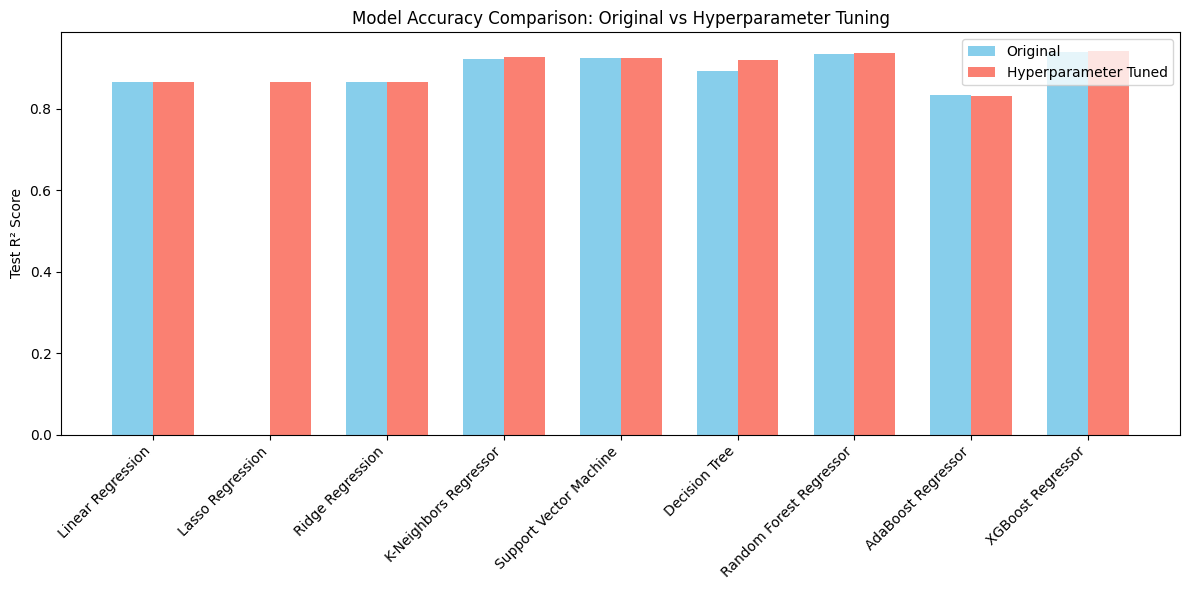

In [26]:


# Ensure model names match in both DataFrames
# We'll use 'Test_R2' as accuracy
compare_df = pd.DataFrame({
    "Model": results_df["Model"],
    "Original R2": results_df["Test_R2"],
    "Hyperparam R2": hyperparam_results["Test_R2"]
})

# Set figure size
plt.figure(figsize=(12,6))

# X-axis positions
x = range(len(compare_df))

# Bar width
width = 0.35

# Plot original vs hyperparam R2
plt.bar(x, compare_df["Original R2"], width=width, label="Original", color="skyblue")
plt.bar([i + width for i in x], compare_df["Hyperparam R2"], width=width, label="Hyperparameter Tuned", color="salmon")

# Labels and ticks
plt.xticks([i + width/2 for i in x], compare_df["Model"], rotation=45, ha="right")
plt.ylabel("Test R² Score")
plt.title("Model Accuracy Comparison: Original vs Hyperparameter Tuning")
plt.legend()
plt.tight_layout()
plt.show()


# 8.Model Selection

✅ Sorted Model Performance Summary:


,Model,Best_Params,Train_R2,Test_R2,Overfit_Gap,Test_RMSE,Test_MAE
0,XGBoost Regressor,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.962439,0.940681,0.021757,0.172158,0.126091
1,Random Forest Regressor,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_...",0.976102,0.935934,0.040168,0.178914,0.129797
2,K-Neighbors Regressor,"{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}",0.997030,0.928155,0.068875,0.189465,0.137206
3,Support Vector Machine,{},0.933384,0.925211,0.008173,0.193308,0.142669
4,Decision Tree,"{'max_depth': 20, 'min_samples_leaf': 5, 'min_...",0.961009,0.919234,0.041775,0.200883,0.145714
5,Linear Regression,{},0.868255,0.865838,0.002417,0.258908,0.196596
6,Ridge Regression,{'alpha': 0.1},0.868255,0.865835,0.002420,0.258911,0.196600
7,Lasso Regression,{'alpha': 0.001},0.868078,0.865748,0.002330,0.258994,0.196643
8,AdaBoost Regressor,"{'learning_rate': 0.5, 'n_estimators': 100}",0.836190,0.832413,0.003777,0.289368,0.232122


________________________________________________________________________________________________________________________________________________________________________________________________________ 



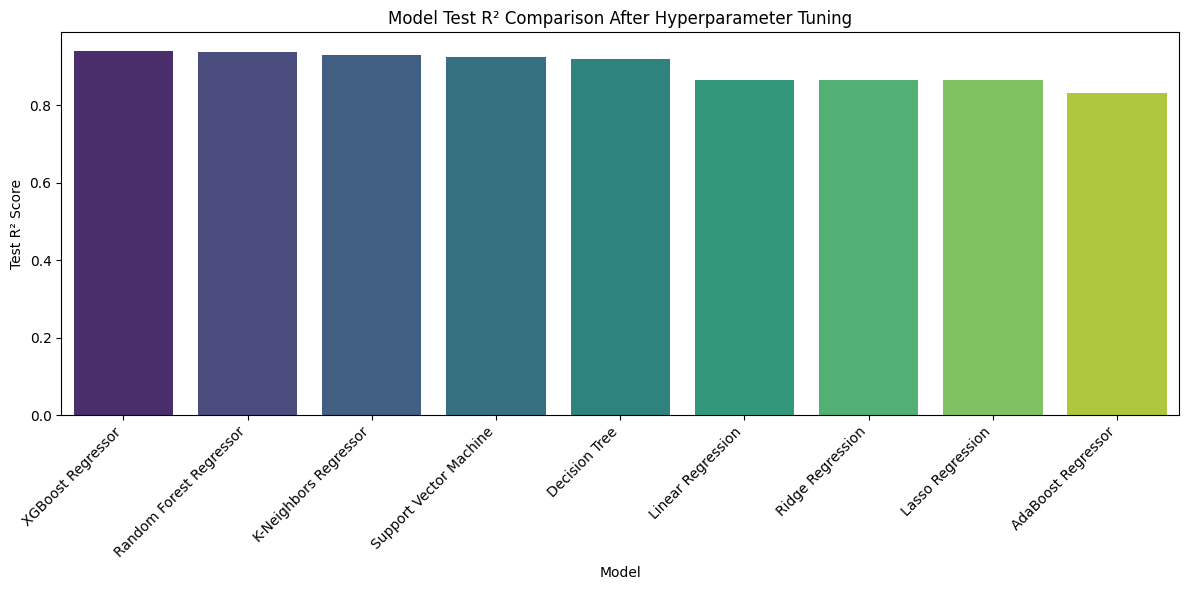

________________________________________________________________________________________________________________________________________________________________________________________________________ 



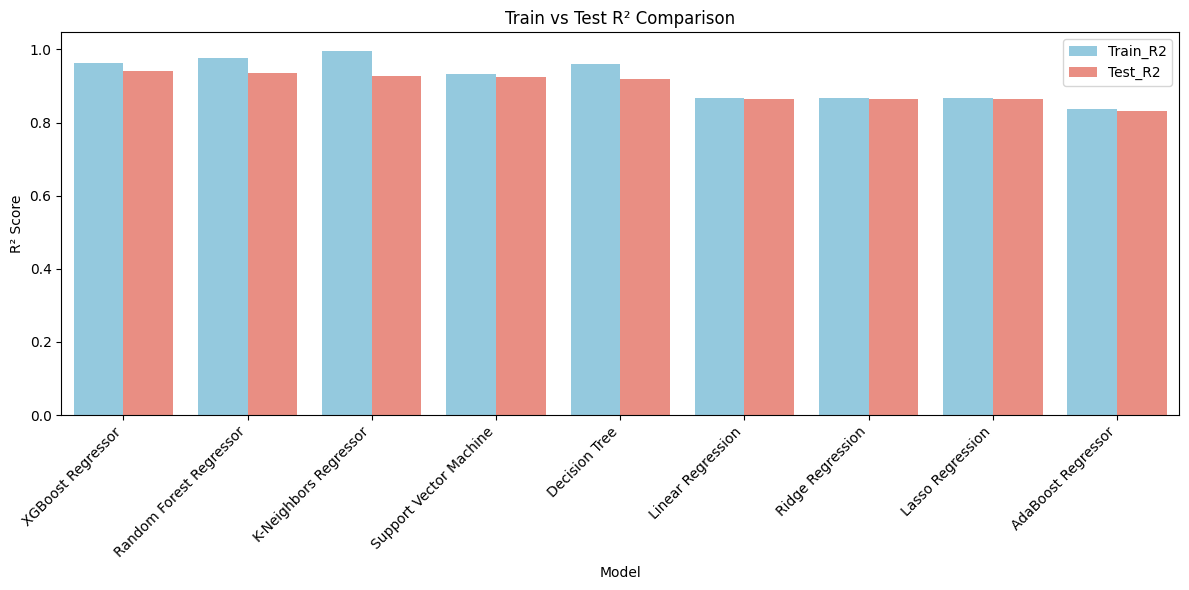

________________________________________________________________________________________________________________________________________________________________________________________________________ 

 Selected Best Model: XGBoost Regressor
 Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
 Test R²: 0.9407 | Overfit Gap: 0.0218


In [29]:
# Overfit_Gap = Train_R2 - Test_R2 (smaller is better)
hyperparam_results["Overfit_Gap"] = hyperparam_results["Train_R2"] - hyperparam_results["Test_R2"]

# Sort models based on Test R2 (accuracy) and Overfit_Gap
# First priority: high Test_R2, Second priority: low Overfit_Gap
hyperparam_results_sorted = hyperparam_results.sort_values(
    by=["Test_R2", "Overfit_Gap"], ascending=[False, True]
).reset_index(drop=True)

# Display summary table
print("Sorted Model Performance Summary:")
display(hyperparam_results_sorted[[
    "Model", "Best_Params", "Train_R2", "Test_R2", "Overfit_Gap", "Test_RMSE", "Test_MAE"
]])

print("__"*100,"\n")

# Visual Comparison - Test R2 (accuracy) of all models
plt.figure(figsize=(12,6))
sns.barplot(
    data=hyperparam_results_sorted,
    x="Model",
    y="Test_R2",
    palette="viridis"
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Test R² Score")
plt.title("Model Test R² Comparison After Hyperparameter Tuning")
plt.tight_layout()
plt.show()

print("__"*100,"\n")
# Visualize Train vs Test R2 for all models
hyperparam_melted = hyperparam_results_sorted.melt(
    id_vars="Model",
    value_vars=["Train_R2", "Test_R2"],
    var_name="Dataset",
    value_name="R2_Score"
)
plt.figure(figsize=(12,6))
sns.barplot(data=hyperparam_melted, x="Model", y="R2_Score", hue="Dataset", palette=["skyblue","salmon"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("R² Score")
plt.title("Train vs Test R² Comparison")
plt.legend()
plt.tight_layout()
plt.show()

# Select the Best Model Automatically
best_model_info = hyperparam_results_sorted.iloc[0]  # top model after sorting
best_model_name = best_model_info["Model"]
best_model_params = best_model_info["Best_Params"]

print("__"*100,"\n")
print(f" Selected Best Model: {best_model_name}")
print(f" Best Hyperparameters: {best_model_params}")
print(f" Test R²: {best_model_info['Test_R2']:.4f} | Overfit Gap: {best_model_info['Overfit_Gap']:.4f}")


# 9.Model Deployment